In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df1.index.freq = 'MS'

In [6]:
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [7]:
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [8]:
df2.index.freq = 'D'

# Test for stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

In [11]:
dftest = adfuller(df1['Thousands of Passengers'])

In [12]:
dftest

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [13]:
dftest[1]

0.991880243437641

In [15]:
print("Since the p-value of the dickey-fuller test is greater than 0.05, data is non-stationary")

Since the p-value of the dickey-fuller test is greater than 0.05, data is non-stationary


In [17]:
## test for the causality
df3 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)

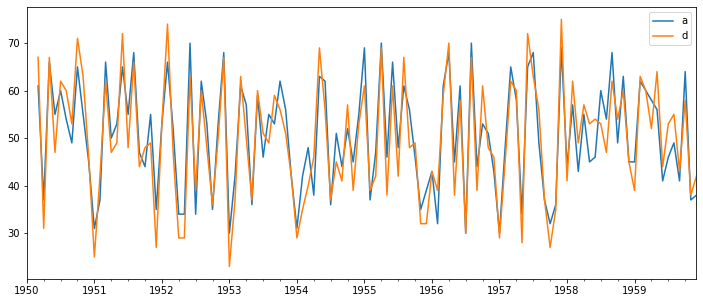

In [18]:
df3['a'].iloc[2:].plot(figsize=(12,5),legend=True)
df3['d'].shift(2).plot(legend=True)

These two series seem to be correlated and we can conclude that they are having causality. We can find this using the Granger Causality Test

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

In [24]:
grangercausalitytests(df3[['a','d']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=136.1258, p=0.0000  

**Here we are looking for extremely small p-values. We are getting these values at order 2 lag. This means that two columns have causality with order 2**

# Month and quarter plot

In [25]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

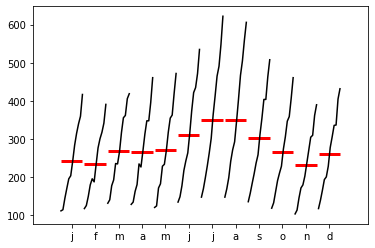

In [27]:
month_plot(df1['Thousands of Passengers']);

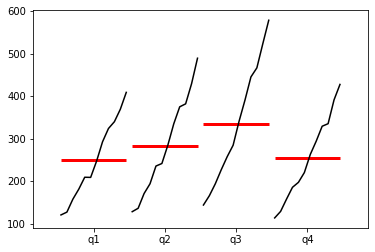

In [29]:
quarter_plot(df1['Thousands of Passengers'].resample(rule='Q').mean());